In [ ]:
# DETACHED - PREDICTION (OBSERVED CURVES)

In [1]:
# BLOK 1
# Importovanie kniznic.

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from keras.models import load_model
from ast import literal_eval

In [2]:
# BLOK 2
# Nacitanie observacnych dat a vsetkych modelov.

data=pd.read_csv("observed.csv")

m_t1t2=load_model("detached_sT_pT.hdf5")      #pomer primary__t_eff a secondary__t_eff
m_psp=load_model("detached_pSP.hdf5")         #primary surface_potential
m_ssp=load_model("detached_sSP.hdf5")         #secondary surface potential
m_inc=load_model("detached_inclination.hdf5") #inclination
m_mr=load_model("detached_mass_ratio.hdf5")   #mass_ratio

In [3]:
# BLOK 3
# Priprava dat.

data["inc"]=(data["inc"]*math.pi)/180.0
data["t2/t1"]=data["T2"]/data["T1"]
data=data[["name", "filter", "Spot", "t2/t1", "inc", "q", "omega1", "omega2", "curve", "Type"]]
data=data.loc[data.Type.isin(["detached", "detected"])]

X=[]
for row in data["curve"]:
    processed_data=literal_eval(row)
    X.append(processed_data)
X=np.array(X, dtype=np.float32)

In [5]:
# BLOK 4
# Vytvorenie funkcie na predikciu vsetkych parametrov. Vytvorenie tabulky povodnych a predikovanych hodnot.

def predict_parameters(curves):
    pred_t1t2=m_t1t2.predict(curves)
    pred_inc=m_inc.predict(curves)
    pred_mr=m_mr.predict(curves)
    pred_psp=m_psp.predict(curves)
    pred_ssp=m_ssp.predict(curves)
    pred_t1t2=np.reshape(pred_t1t2, len(pred_t1t2))
    pred_inc=np.reshape(pred_inc, len(pred_inc))
    pred_mr=np.reshape(pred_mr, len(pred_mr))
    pred_psp=np.reshape(pred_psp, len(pred_psp))
    pred_ssp=np.reshape(pred_ssp, len(pred_ssp))
    return pred_t1t2, pred_inc, pred_mr, pred_psp, pred_ssp

x,y,z,w,v = predict_parameters(X)
new_data=data
new_data["t2/t1_predicted"]=x
new_data["inc_predicted"]=y
new_data["q_predicted"]=z
new_data["omega1_predicted"]=w
new_data["omega2_predicted"]=v
new_data=new_data[["name", "filter", "Spot", "t2/t1", "t2/t1_predicted", "inc", "inc_predicted", "q", "q_predicted", "omega1", "omega1_predicted",
                  "omega2", "omega2_predicted"]]

In [6]:
# BLOK 5 
# Vytvorenie funkcie na pridavanie spot-ov do grafov.

def autolabel(rects, pos):
    n=0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , pos,
                s=spot.Spot[n],
                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
        n=n+1
        
spot=new_data[["name", "Spot"]].drop_duplicates().reset_index()
spot.Spot=spot.Spot.map({"N":"", "Y":"SPOT", "y":"SPOT"})

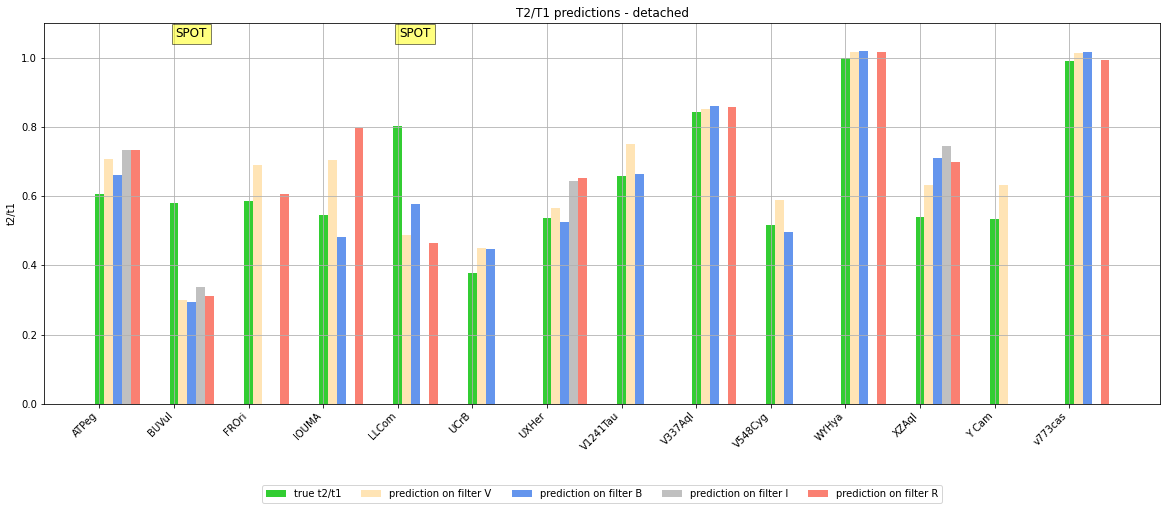

In [7]:
# BLOK 6
# Vykreslenie grafu predikcie pomerov efektivnych teplot (skutocnost a predikcia).

true_t2_t1=new_data[["t2/t1", "name"]].groupby(["name"]).mean()
names=pd.DataFrame(data={"name":true_t2_t1.index})                #názvy systémov hviezd
t2_t1_B=pd.merge(names, new_data[new_data["filter"]=="B"][["t2/t1_predicted", "name"]], how="left")
t2_t1_V=pd.merge(names, new_data[new_data["filter"]=="V"][["t2/t1_predicted", "name"]], how="left")
t2_t1_R=pd.merge(names, new_data[new_data["filter"]=="R"][["t2/t1_predicted", "name"]], how="left")
t2_t1_I=pd.merge(names, new_data[new_data["filter"]=="I"][["t2/t1_predicted", "name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_t2_t1["t2/t1"], barWidth, label='true t2/t1', color="limegreen")
ax.bar(br2, t2_t1_V["t2/t1_predicted"], barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, t2_t1_B["t2/t1_predicted"], barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, t2_t1_I["t2/t1_predicted"], barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, t2_t1_R["t2/t1_predicted"], barWidth, label='prediction on filter R', color="salmon")

plt.title("T2/T1 predictions - detached")
plt.xticks(br1, true_t2_t1.index, rotation=45, ha='right')
plt.ylabel("t2/t1")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(b="on")
plt.ylim(top=1.1)
autolabel(r, 1.05)
plt.show()

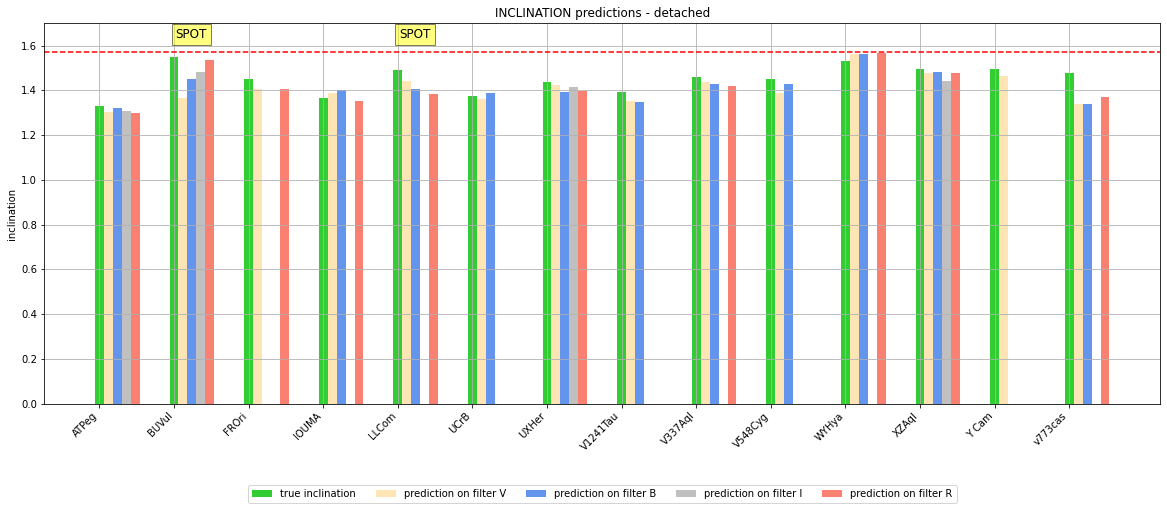

In [8]:
# BLOK 7
# Vykreslenie grafu predikcie sklonu (skutocnost a predikcia). 

true_inc=new_data[["inc", "name"]].groupby(["name"]).mean()
inc_B=pd.merge(names, new_data[new_data["filter"]=="B"][["inc_predicted", "name"]], how="left")
inc_V=pd.merge(names, new_data[new_data["filter"]=="V"][["inc_predicted", "name"]], how="left")
inc_R=pd.merge(names, new_data[new_data["filter"]=="R"][["inc_predicted", "name"]], how="left")
inc_I=pd.merge(names, new_data[new_data["filter"]=="I"][["inc_predicted", "name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_inc.inc, barWidth, label='true inclination', color="limegreen")
ax.bar(br2, inc_V.inc_predicted, barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, inc_B.inc_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, inc_I.inc_predicted, barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, inc_R.inc_predicted, barWidth, label='prediction on filter R', color="salmon")

plt.title("INCLINATION predictions - detached")
plt.xticks(br1, true_inc.index, rotation=45, ha='right')
plt.ylabel("inclination")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.axhline(math.pi/2, c="r", linestyle="--") # 90° resp. pi/2

plt.grid(b="on")
plt.ylim(top=1.7)       
autolabel(r, 1.62)
plt.show()

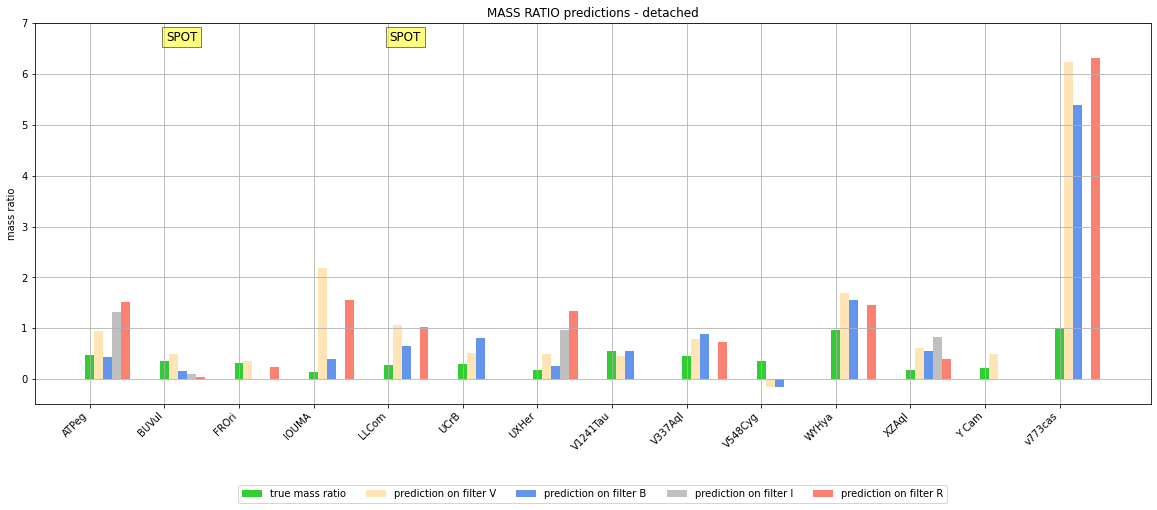

In [9]:
# BLOK 8 
# Vykreslenie grafu predikcie pomeru hmotnosti (skutocnost a predikcia). 

true_mr=new_data[["q", "name"]].groupby(["name"]).mean()
mr_B=pd.merge(names, new_data[new_data["filter"]=="B"][["q_predicted", "name"]], how="left")
mr_V=pd.merge(names, new_data[new_data["filter"]=="V"][["q_predicted", "name"]], how="left")
mr_R=pd.merge(names, new_data[new_data["filter"]=="R"][["q_predicted", "name"]], how="left")
mr_I=pd.merge(names, new_data[new_data["filter"]=="I"][["q_predicted", "name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_mr.q, barWidth, label='true mass ratio', color="limegreen")
ax.bar(br2, mr_V.q_predicted, barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, mr_B.q_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, mr_I.q_predicted, barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, mr_R.q_predicted, barWidth, label='prediction on filter R', color="salmon")

plt.title("MASS RATIO predictions - detached")
plt.xticks(br1, true_mr.index, rotation=45, ha='right')
plt.ylabel("mass ratio")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(b="on")
plt.ylim(top=7)
autolabel(r, 6.6)
plt.show()

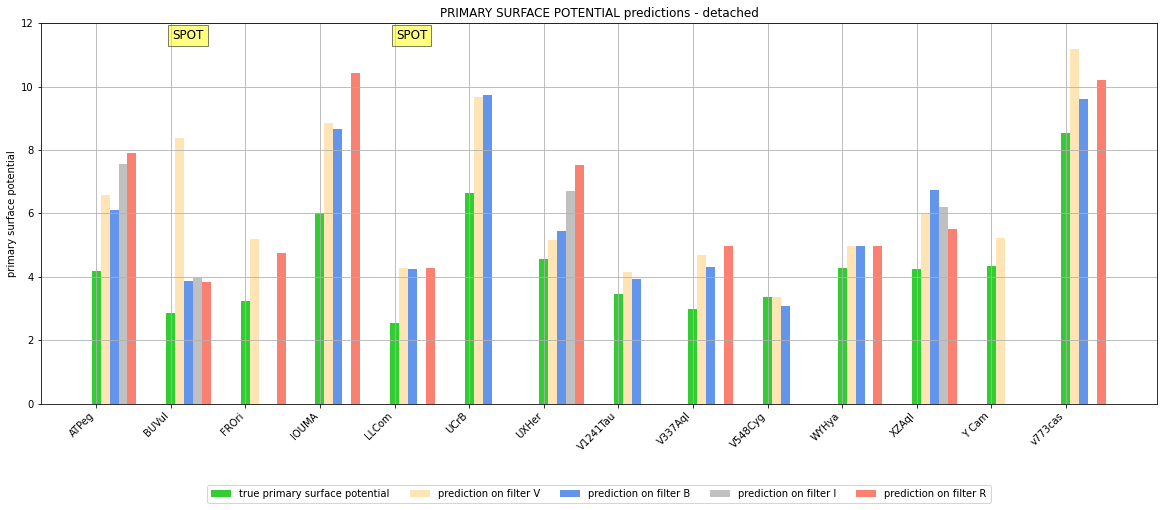

In [10]:
# BLOK 9 
# Vykreslenie grafu predikcie primarneho povrchoveho potencialu (skutocnost a predikcia). 

true_psp=new_data[["omega1", "name"]].groupby(["name"]).mean()
psp_B=pd.merge(names, new_data[new_data["filter"]=="B"][["omega1_predicted", "name"]], how="left")
psp_V=pd.merge(names, new_data[new_data["filter"]=="V"][["omega1_predicted", "name"]], how="left")
psp_R=pd.merge(names, new_data[new_data["filter"]=="R"][["omega1_predicted", "name"]], how="left")
psp_I=pd.merge(names, new_data[new_data["filter"]=="I"][["omega1_predicted", "name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_psp.omega1, barWidth, label='true primary surface potential', color="limegreen")
ax.bar(br2, psp_V.omega1_predicted, barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, psp_B.omega1_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, psp_I.omega1_predicted, barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, psp_R.omega1_predicted, barWidth, label='prediction on filter R', color="salmon")

plt.title("PRIMARY SURFACE POTENTIAL predictions - detached")
plt.xticks(br1, true_psp.index, rotation=45, ha='right')
plt.ylabel("primary surface potential")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(b="on")
plt.ylim(top=12)
autolabel(r, 11.4)
plt.show()

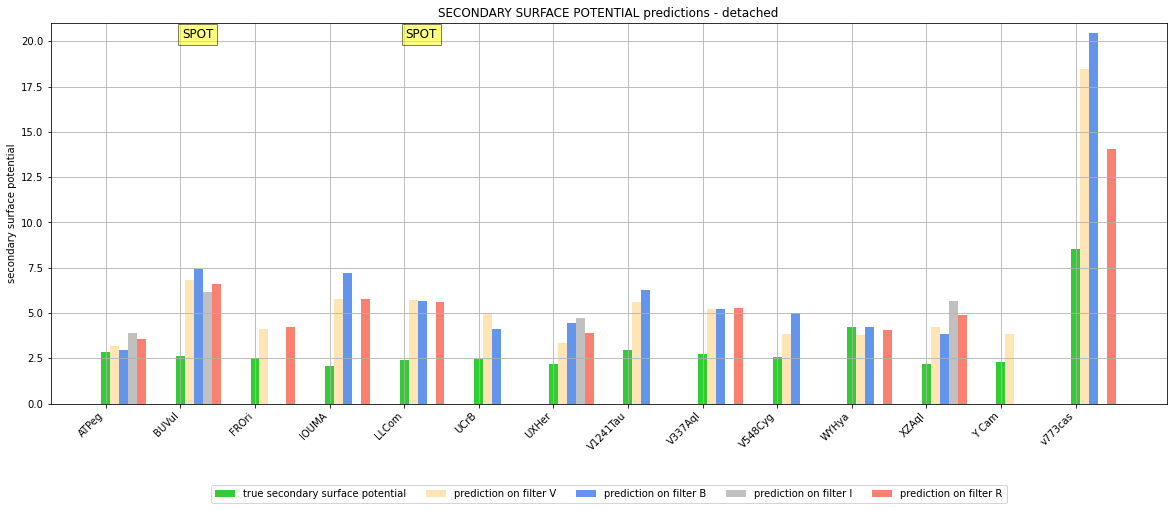

In [11]:
# BLOK 10 
# Vykreslenie grafu predikcie sekundarneho povrchoveho potencialu (skutocnost a predikcia). 

true_ssp=new_data[["omega2", "name"]].groupby(["name"]).mean()
ssp_B=pd.merge(names, new_data[new_data["filter"]=="B"][["omega2_predicted", "name"]], how="left")
ssp_V=pd.merge(names, new_data[new_data["filter"]=="V"][["omega2_predicted", "name"]], how="left")
ssp_R=pd.merge(names, new_data[new_data["filter"]=="R"][["omega2_predicted", "name"]], how="left")
ssp_I=pd.merge(names, new_data[new_data["filter"]=="I"][["omega2_predicted", "name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_ssp.omega2, barWidth, label='true secondary surface potential', color="limegreen")
ax.bar(br2, ssp_V.omega2_predicted, barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, ssp_B.omega2_predicted, barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, ssp_I.omega2_predicted, barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, ssp_R.omega2_predicted, barWidth, label='prediction on filter R', color="salmon")

plt.title("SECONDARY SURFACE POTENTIAL predictions - detached")
plt.xticks(br1, true_ssp.index, rotation=45, ha='right')
plt.ylabel("secondary surface potential")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(b="on")
plt.ylim(top=21)
autolabel(r, 20)
plt.show()